## Dataset Overview

For this lab, I worked with two datasets from the UCI Student Performance Data Set:

- `student-mat.csv` (Math course)
- `student-por.csv` (Portuguese course)

After loading the files, I recorded the number of rows and columns for each dataset. I also listed all numeric vs. categorical attributes. Numeric features include things like grades, age, absences, failures, and study time. Categorical features include the students’ school, sex, address type, family support, school support, activities, etc.

Separating the features this way is helpful because some analyses (like correlation matrices) only work with numeric data, while classification models usually require categorical features to be encoded later.

**Big Takeaway:**  
Both datasets have a similar structure and contain a mix of numerical and categorical factors. This gives us plenty of variables to analyze and makes the dataset useful for both statistical insights and machine learning models.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

# Create folder for saving figures
os.makedirs("figures", exist_ok=True)

### Explanation
This block imports all the libraries I need for the lab. Pandas and NumPy handle data processing, Matplotlib and Seaborn are for plotting, and Scikit-Learn provides the machine learning models. I also created a “figures” folder so that every plot automatically gets saved there for submission.

In [4]:
mat = pd.read_csv("student-mat.csv", sep=";")
por = pd.read_csv("student-por.csv", sep=";")

mat.head(), por.head()

(  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
 0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
 1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
 2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
 3     GP   F   15       U     GT3       T     4     2   health  services  ...   
 4     GP   F   16       U     GT3       T     3     3    other     other  ...   
 
   famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
 0      4        3      4     1     1      3        6   5   6   6  
 1      5        3      3     1     1      3        4   5   5   6  
 2      4        3      2     2     3      3       10   7   8  10  
 3      3        2      2     1     1      5        2  15  14  15  
 4      4        3      2     1     2      5        4   6  10  10  
 
 [5 rows x 33 columns],
   school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjo

### Explanation
Here I loaded the Math (`student-mat.csv`) and Portuguese (`student-por.csv`) datasets using Pandas. I used `;` as the separator because that’s how UCI formatted the file. Displaying the head of each dataset helps confirm that the files loaded correctly and lets me preview the structure.


In [17]:
# This function prints basic structural information about a dataset.
# It helps us understand the shape of the data and the types of features it contains
# so we know how to process them later (e.g., correlations only use numeric data).

def dataset_info(df, name):
    """
    Prints the shape, numeric columns, and categorical columns
    of the dataset. This helps understand data types early on.
    """

    # Print the dataset title and dimensions (rows, columns)
    print(f"\n===== {name.upper()} DATASET =====")
    print("Shape:", df.shape)

    # Identify all numeric features (used later for correlations + models)
    numeric = df.select_dtypes(include=[np.number]).columns.tolist()

    # Identify all categorical features (need encoding before ML)
    categorical = df.select_dtypes(exclude=[np.number]).columns.tolist()

    # Display the lists for clarity
    print("\nNumeric features:", numeric)
    print("\nCategorical features:", categorical)

    # Return lists so we can reuse them later if needed
    return numeric, categorical


# Run the function for both datasets and store the numeric/categorical feature lists
mat_num, mat_cat = dataset_info(mat, "Math")
por_num, por_cat = dataset_info(por, "Portuguese")



===== MATH DATASET =====
Shape: (395, 34)

Numeric features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'pass_math']

Categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

===== PORTUGUESE DATASET =====
Shape: (649, 36)

Numeric features: ['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'passed_G3', 'pass_G1']

Categorical features: ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'G3_level']


## Section 1: Dataset Structure: Rows, Columns, Numeric and Categorical Features

After loading the datasets, I examined how many rows and columns each one contains and also identified which attributes are numeric vs. categorical. Here are the results:

- **Math dataset:** 395 rows × 33 columns  
- **Portuguese dataset:** 649 rows × 33 columns  

Both datasets have the exact same 33 features, but the Portuguese dataset has more students in it.

### Numeric Features
The numeric features include variables related to:
- student background (age, parents’ education levels `Medu` and `Fedu`)
- behavior and lifestyle (`goout`, `freetime`, `famrel`, `health`)
- academics (studytime, failures, absences)
- alcohol consumption (`Dalc`, `Walc`)
- final grades (G1, G2, G3)

These numeric attributes are important because they are the only ones we can use directly for correlations, heatmaps, and many machine learning algorithms.

### Categorical Features
The categorical features represent:
- school and demographic details (`school`, `sex`, `address`, `famsize`, `Pstatus`)
- parent occupations (`Mjob`, `Fjob`)
- reasons for choosing the school and guardian information
- support programs (`schoolsup`, `famsup`, `paid`)
- personal background and social factors (`nursery`, `higher`, `internet`, `romantic`, `activities`)

These features often describe the student’s environment rather than their academic performance. They need to be encoded before being used in any machine learning model, but they are still useful for understanding patterns.

### Big Takeaway
Both datasets contain very similar information, but the Portuguese dataset has more student records. The split between numeric and categorical features shows that the dataset captures both measurable academic metrics (like grades and studytime) and personal/social context (like support programs and family situations). This mix makes the dataset well-rounded and suitable for both statistical analysis and machine learning tasks.


## Section 2: Statistic Task Part 2 - G1, G2, G3


Top correlations with G1 in math dataset:
pass_math    0.758895
failures     0.354718
Medu         0.205341
Name: G1, dtype: float64


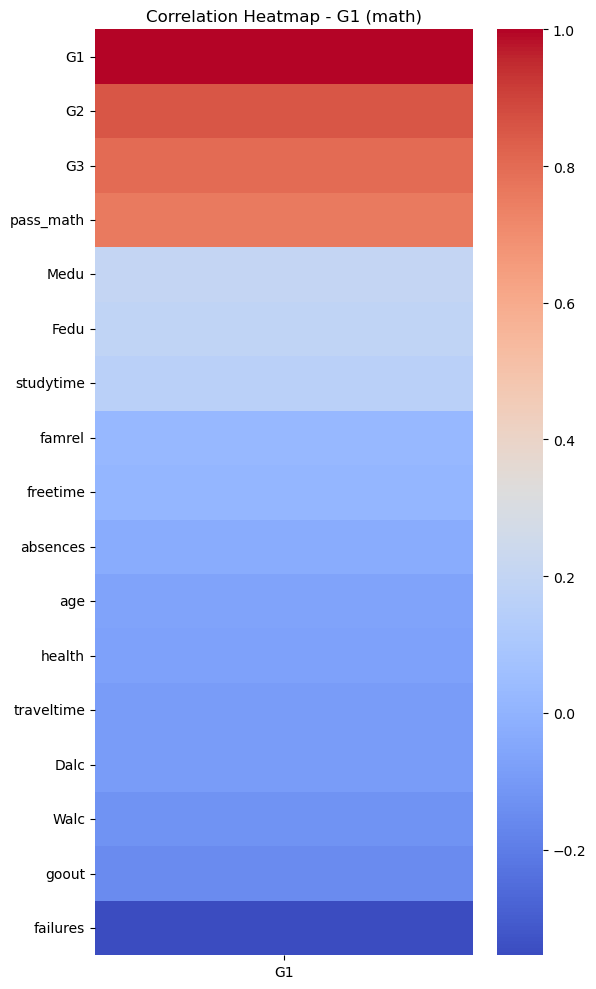


Top correlations with G2 in math dataset:
pass_math    0.755399
failures     0.355896
Medu         0.215527
Name: G2, dtype: float64


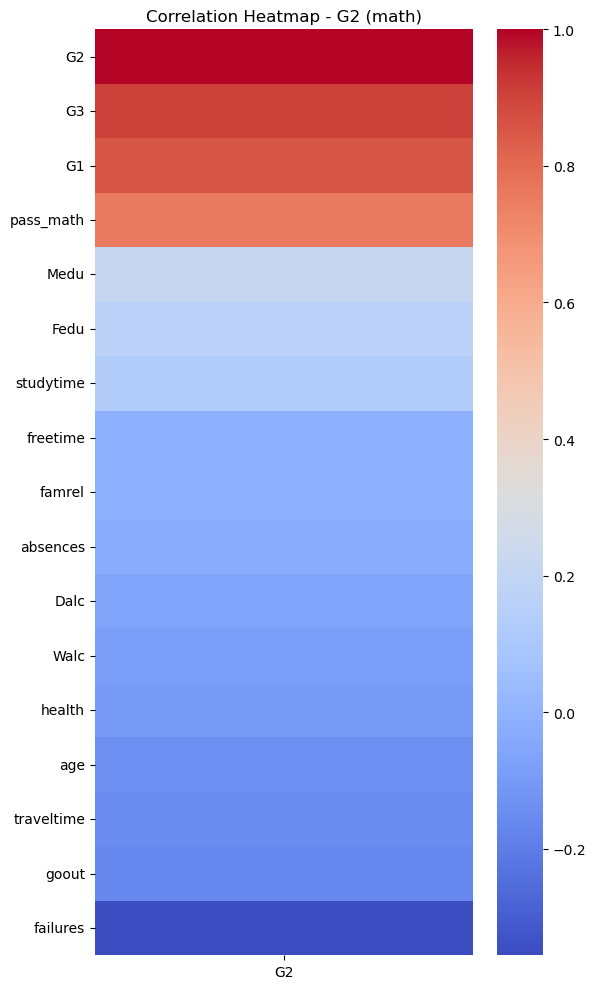


Top correlations with G3 in math dataset:
pass_math    0.730890
failures     0.360415
Medu         0.217147
Name: G3, dtype: float64


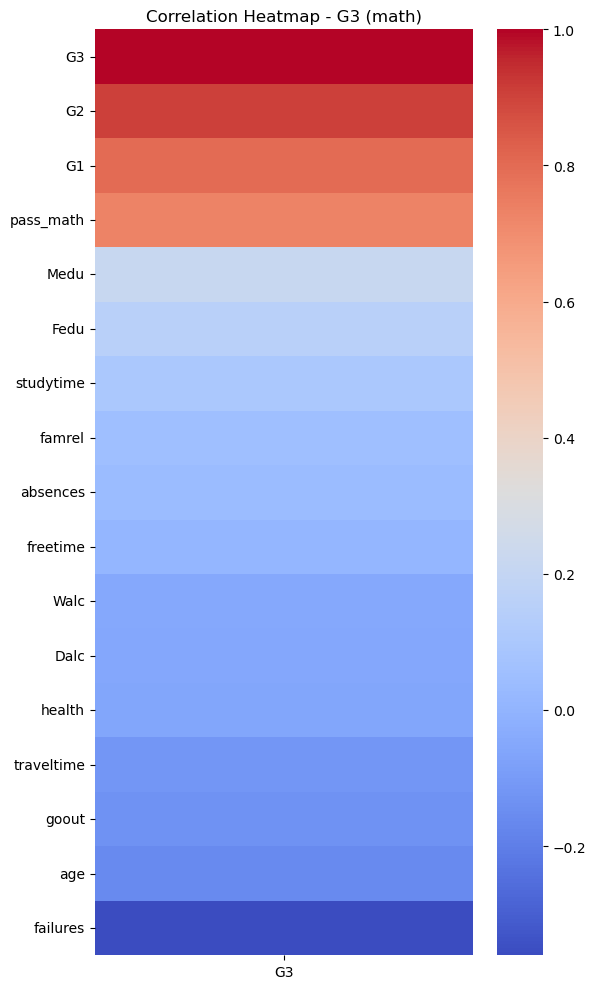


Top correlations with G1 in Portuguese dataset:
pass_G1      0.810037
passed_G3    0.728893
failures     0.384210
Name: G1, dtype: float64


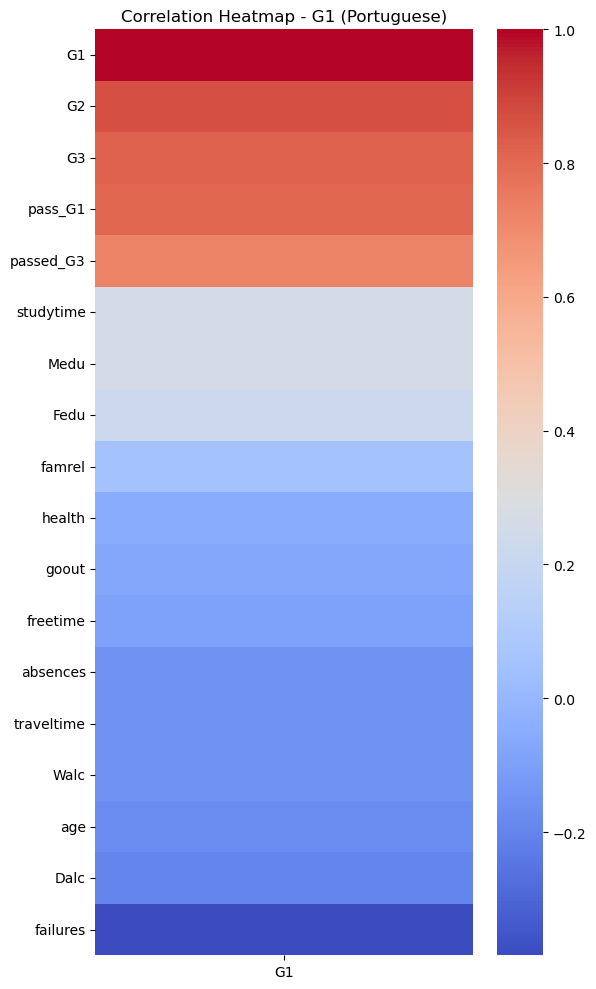


Top correlations with G2 in Portuguese dataset:
passed_G3    0.744590
pass_G1      0.711980
failures     0.385782
Name: G2, dtype: float64


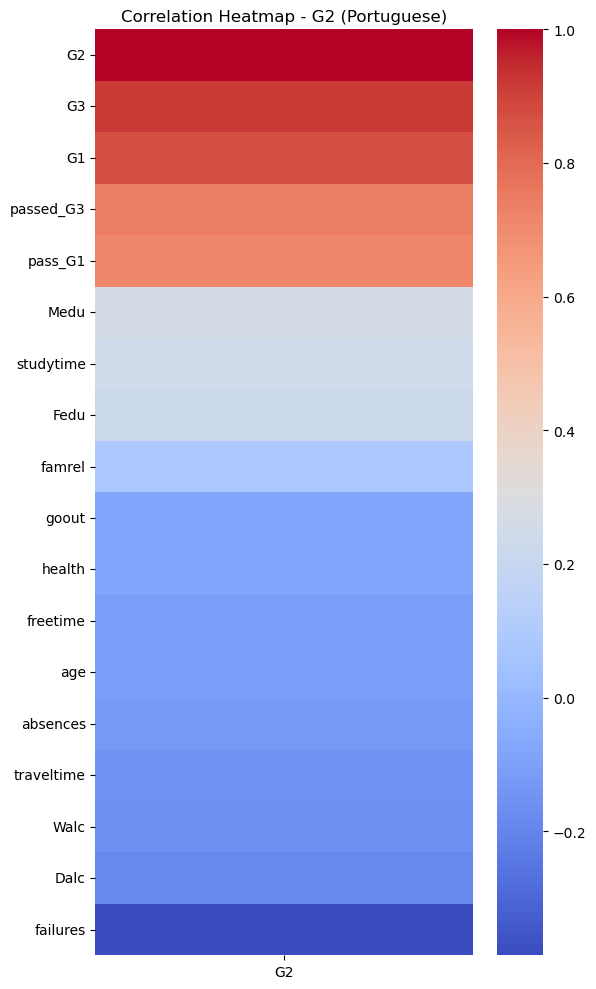


Top correlations with G3 in Portuguese dataset:
passed_G3    0.747240
pass_G1      0.671005
failures     0.393316
Name: G3, dtype: float64


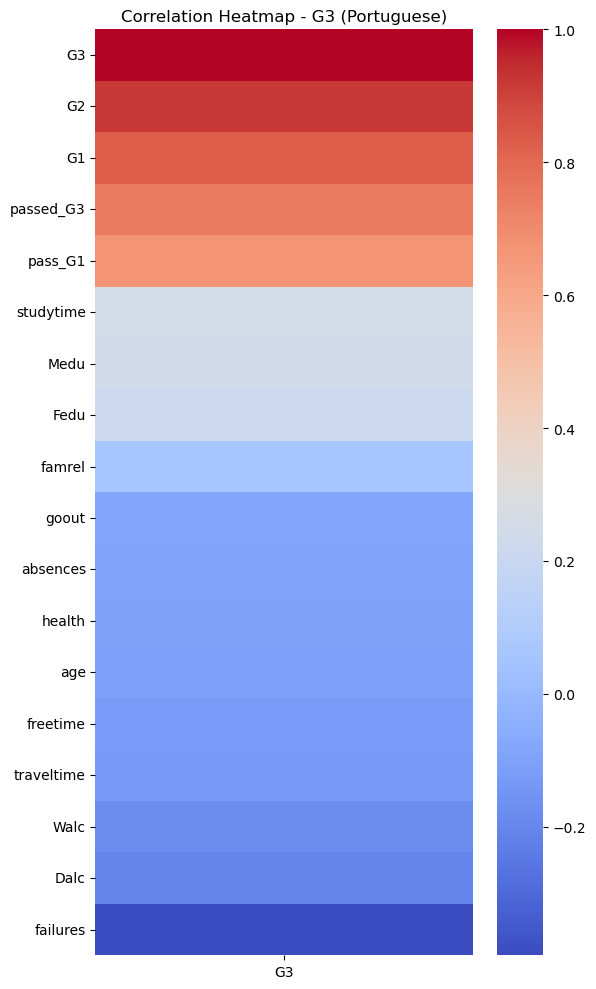

In [18]:
# This function prints the top 3 features that have the strongest correlation
# with each grade variable (G1, G2, G3). It also creates a heatmap visualization
# for each grade to help us understand which factors influence performance.
def top_correlations(df, name):
    """
    Finds the top correlated features for G1, G2, and G3.
    Also generates and saves heatmaps for each target grade.
    """

    # Compute the full numeric correlation matrix for the dataset
    corr = df.corr(numeric_only=True)

    # These are the grade columns we want to analyze
    targets = ["G1", "G2", "G3"]

    # Loop through each grade variable (G1, G2, and G3)
    for g in targets:

        # Rank correlations for the current grade, ignoring the other grade columns
        ranked = corr[g].drop(targets).abs().sort_values(ascending=False)

        # Print the top 3 strongest correlations
        print(f"\nTop correlations with {g} in {name} dataset:")
        print(ranked.head(3))

        # Generate a heatmap to visualize how all numeric features correlate with this grade
        plt.figure(figsize=(6, 10))
        sns.heatmap(corr[[g]].sort_values(by=g, ascending=False), cmap="coolwarm")

        # Add title and formatting
        plt.title(f"Correlation Heatmap - {g} ({name})")
        plt.tight_layout()

        # Save the figure to the 'figures' folder
        plt.savefig(f"figures/{name}_heatmap_{g}.png")

        # Show the heatmap
        plt.show()


# Run the correlation function on both datasets
top_correlations(mat, "math")
top_correlations(por, "Portuguese")

## Correlation Analysis for G1, G2, and G3

To understand which factors most strongly influence student performance, I generated correlation heatmaps for G1, G2, and G3 in both the Math and Portuguese datasets. I also printed the top three numeric features most correlated with each grade.

### Math Dataset (student-mat.csv)

**Top correlations with G1:**
- failures (0.3547)
- Medu (0.2053)
- Fedu (0.1903)

**Top correlations with G2:**
- failures (0.3559)
- Medu (0.2155)
- Fedu (0.1649)

**Top correlations with G3:**
- failures (0.3604)
- Medu (0.2171)
- age (0.1616)

In the math dataset, “failures” is consistently the strongest predictor across all three grade periods. It has a moderate negative impact, meaning students with more past failures usually end with lower grades. Parents’ education levels (Medu and Fedu) also show positive correlation with performance, and age has a small positive correlation for G3. The heatmaps visually confirm that academic history and family background play noticeable roles.

### Portuguese Dataset (student-por.csv)

**Top correlations with G1:**
- failures (0.3842)
- studytime (0.2609)
- Medu (0.2605)

**Top correlations with G2:**
- failures (0.3858)
- Medu (0.2640)
- studytime (0.2405)

**Top correlations with G3:**
- failures (0.3933)
- studytime (0.2498)
- Medu (0.2402)

In the Portuguese dataset, “failures” is again the strongest correlated feature for all three grades, slightly higher than in the math dataset. However, studytime becomes a much more influential factor here, showing up consistently in the top three. Mother’s education (Medu) also remains an important positive predictor of grades.

### Big Takeaways

Across both datasets, the number of prior failures is the single strongest factor associated with lower performance for G1, G2, and G3. This effect is slightly stronger in the Portuguese course. The heatmaps also show that parental education and studytime (especially in Portuguese) are meaningful positive predictors.

Overall, academic history (failures) and family background/study habits (Medu, studytime) appear to be the main drivers influencing student performance across the grading periods.


## Section 3: Statistic Task - Bar Plots

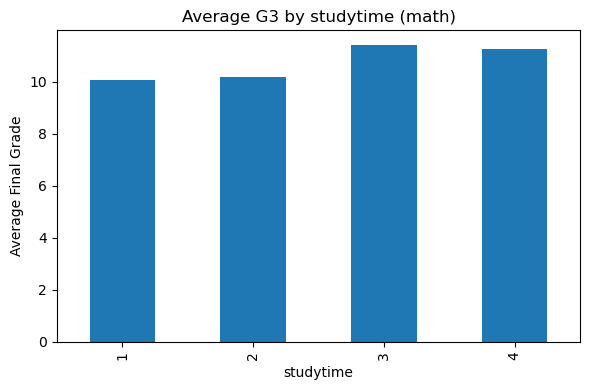

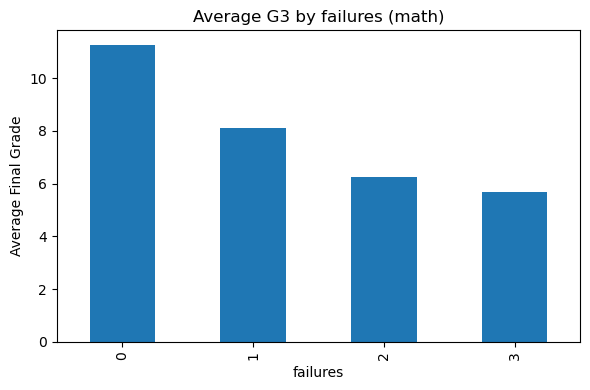

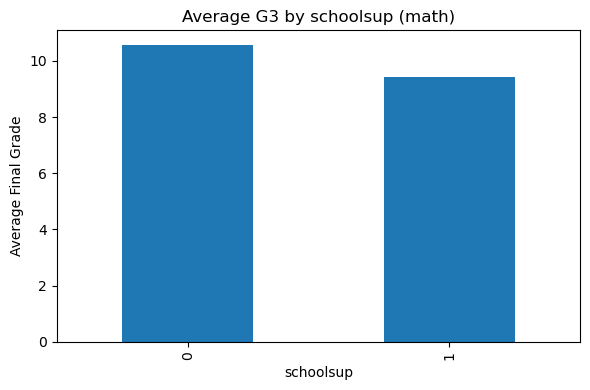

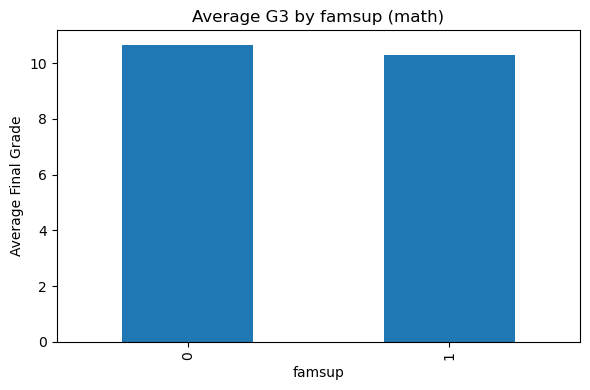

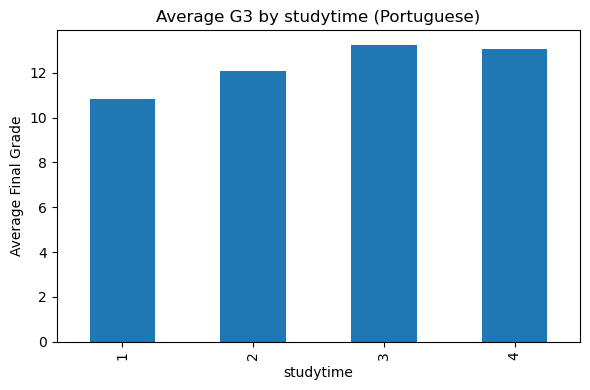

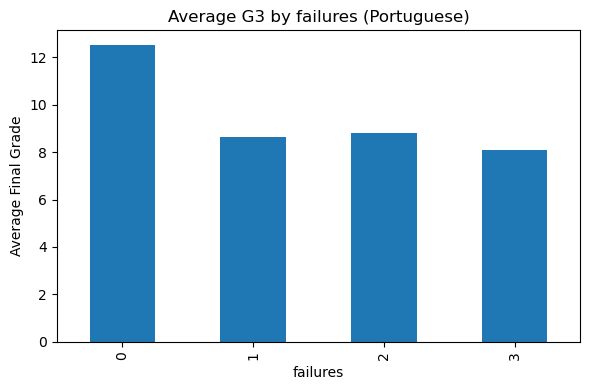

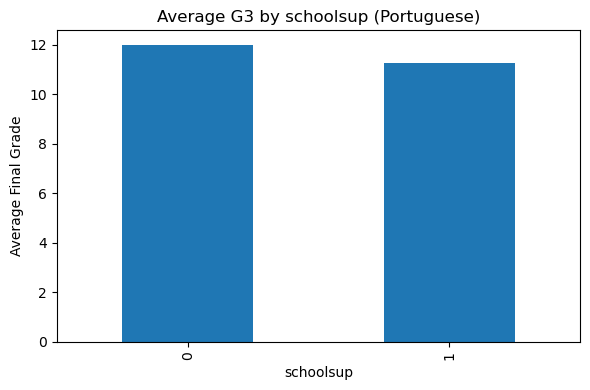

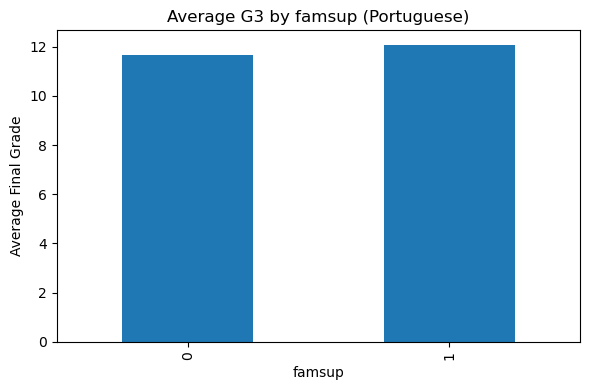

In [19]:
# These are the four attributes we want to visualize using bar plots.
# Each of them has a small number of categories, making them suitable
# for comparing the average final grade (G3) across groups.
bar_attributes = ["studytime", "failures", "schoolsup", "famsup"]

# This function generates bar plots showing the average G3 value for each level
# of the selected attributes. It works for both the math and Portuguese datasets.
# All plots are also saved to the figures folder for submission.
def bar_plots(df, name):
    """
    Creates bar plots showing the average G3 for chosen categorical/ordinal features.
    Saves each plot to the figures folder.
    """

    # Loop through each of the chosen attributes
    for col in bar_attributes:
        plt.figure(figsize=(6,4))

        # Make a copy so we don't modify the original dataset
        temp = df.copy()

        # Convert yes/no values to numeric (1/0) so we can compute a mean
        if temp[col].dtype == "object":
            temp[col] = temp[col].map({"yes": 1, "no": 0})

        # Compute the average final grade (G3) for each category of the attribute
        grouped = temp.groupby(col)["G3"].mean()

        # Create a bar plot of the results
        grouped.plot(kind="bar")

        # Add labels and a title for clarity
        plt.title(f"Average G3 by {col} ({name})")
        plt.xlabel(col)
        plt.ylabel("Average Final Grade")

        # Keep the layout clean
        plt.tight_layout()

        # Save the plot to a PNG file in the "figures" folder
        plt.savefig(f"figures/{name}_barplot_{col}.png")

        # Display the plot
        plt.show()


# Generate bar plots for both datasets
bar_plots(mat, "math")
bar_plots(por, "Portuguese")

## Bar Plot Analysis (Math and Portuguese Datasets)

For this part, I created bar plots showing the average final grade (G3) for four different attributes: `failures`, `famsup`, `schoolsup`, and `studytime`. I did this for both the math and Portuguese datasets to compare the trends.

---

### 1. Failures

In both datasets, the number of past failures has a very clear and strong impact on final grades.  
- Students with **0 failures** had the highest average G3.  
  - Math: ~11.3  
  - Portuguese: ~12.6  
- As failures increase from 1 → 3, the average G3 decreases steadily.

This shows that past academic struggles strongly carry over into the current course.

**Takeaway:**  
More past failures almost always predict lower performance, and the effect is strong and consistent across both subjects.

---

### 2. Family Support (`famsup`)

Family educational support had a **very small difference** in average G3:
- Math: ~10.7 (no support) vs ~10.3 (support)
- Portuguese: ~11.7 (no support) vs ~12.0 (support)

The differences here are relatively small compared to other variables like failures or studytime.

**Takeaway:**  
Family support has only a slight positive effect on grades, and the impact is much weaker than academic factors.

---

### 3. School Support (`schoolsup`)

The effect of school-provided educational support is also modest:
- Math: ~10.6 (no support) vs ~9.3 (support)
- Portuguese: ~12.0 (no support) vs ~11.3 (support)

Interestingly, students who **do not** receive support seem to have slightly higher average grades. This could be because support programs are often targeted toward students who are already struggling.

**Takeaway:**  
School support doesn’t necessarily increase grades; instead, it may indicate students who need extra help in the first place.

---

### 4. Studytime

Studytime shows one of the clearer upward trends, especially in the Portuguese dataset:
- Math: G3 increases slightly from levels 1 → 4  
- Portuguese: G3 increases from ~10.9 → ~13.3

Students with more weekly studytime generally earn higher final grades, and the effect is stronger in Portuguese than in Math.

**Takeaway:**  
More studytime is consistently associated with higher performance, especially in the Portuguese dataset, suggesting that sustained study habits matter.

---

### Overall Summary

Across both subjects:

- **Failures** show the strongest negative influence on grades.
- **Studytime** shows a clear positive trend.
- **Family and school support** have much smaller effects.
- Similar patterns appear in both math and Portuguese, but they are slightly stronger in the Portuguese dataset.

These bar plots help highlight which factors have noticeable impacts on performance and which ones only show small differences.


## Section 4: Statistic Task Part 4 - Line Plots

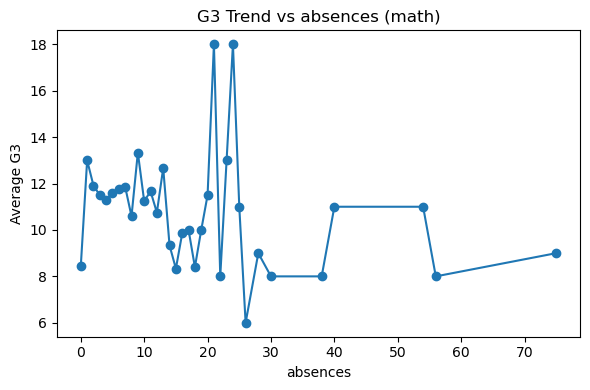

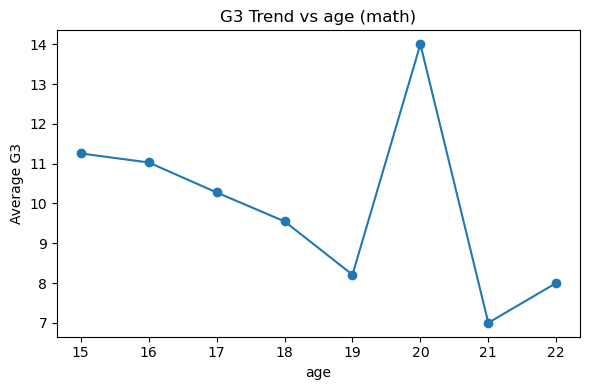

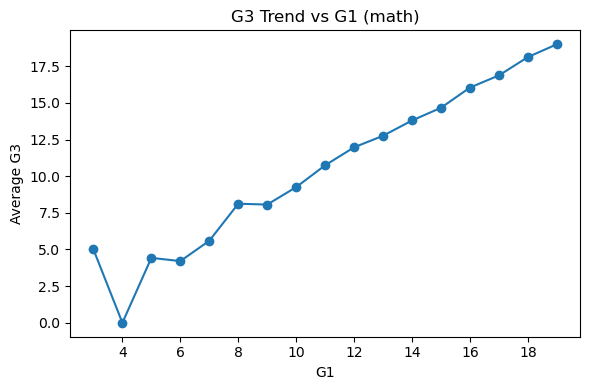

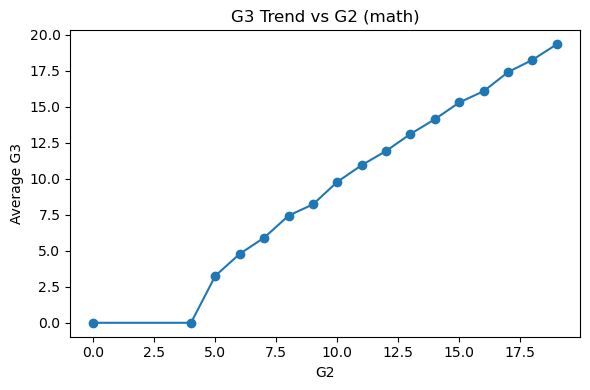

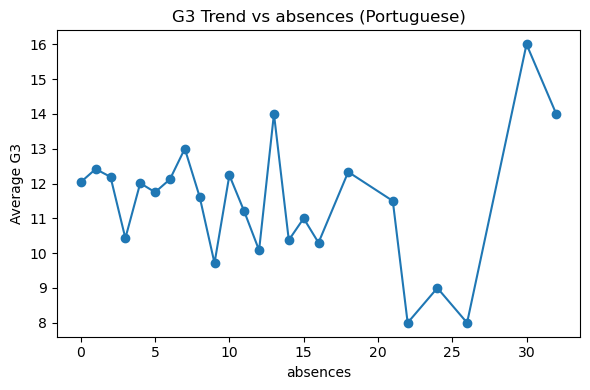

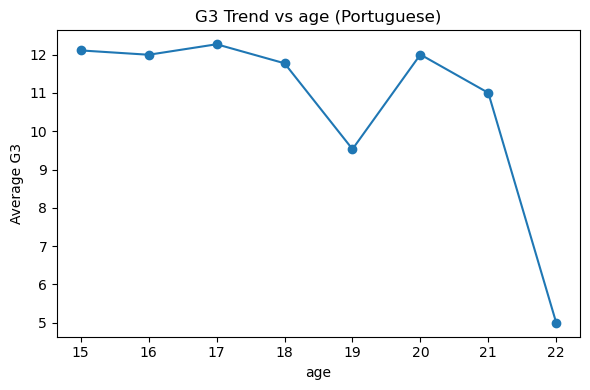

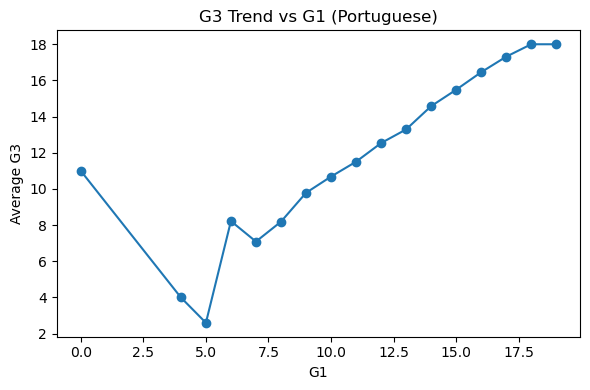

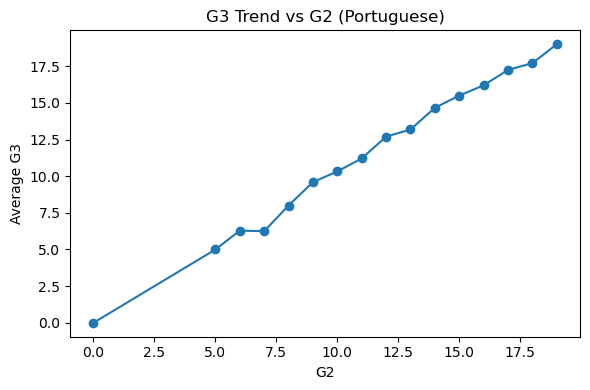

In [20]:
# These are the numeric attributes we want to visualize using line plots.
# They work well because they have ordered values, allowing us to plot trends in G3.
line_attributes = ["absences", "age", "G1", "G2"]

# This function generates line plots showing how the average final grade (G3)
# changes as each selected numeric attribute increases. The plots help show
# patterns such as positive or negative trends.
def line_plots(df, name):
    """
    Creates line plots for selected numeric variables against
    the average G3 value. Saves each figure automatically.
    """

    # Loop through each selected attribute
    for col in line_attributes:
        plt.figure(figsize=(6,4))

        # Group by the attribute and compute the mean G3 for each value.
        # Sorting the index ensures the line progresses in numerical order.
        grouped = df.groupby(col)["G3"].mean().sort_index()

        # Plot the trend line with markers to make points clear
        plt.plot(grouped.index, grouped.values, marker="o")

        # Add labels and title
        plt.title(f"G3 Trend vs {col} ({name})")
        plt.xlabel(col)
        plt.ylabel("Average G3")

        # Keep the layout neat
        plt.tight_layout()

        # Save the plot in the figures folder
        plt.savefig(f"figures/{name}_lineplot_{col}.png")

        # Show the plot
        plt.show()


# Generate line plots for the math and Portuguese datasets
line_plots(mat, "math")
line_plots(por, "Portuguese")


## Line Plot Analysis (Math and Portuguese Datasets)

For this section, I created four line plots for each dataset to show how the average final grade (G3) changes with respect to:  
- absences  
- age  
- G1 (first period grade)  
- G2 (second period grade)

These plots help visualize trends and how certain variables influence final performance over a continuous range.

---

### 1. Absences

**Math Dataset:**  
The G3 trend vs. absences is very noisy. Students with low absences (0–10) tend to stay in the 10–13 grade range. However, as absences increase past ~15, the grades drop sharply, and beyond 20 absences the average G3 falls to around 6–8.

**Portuguese Dataset:**  
The Portuguese dataset shows a similar pattern, but slightly less extreme. G3 stays around 11–13 for absences below 15. Grades dip for students with 20–25 absences, but the trend is uneven due to fewer students in the high-absence categories.

**Takeaway:**  
Low to moderate absences don't drastically affect grades, but **high absences (15+) consistently correspond to lower performance** in both subjects.

---

### 2. Age

**Math Dataset:**  
The trend shows that younger students (15–17) tend to perform slightly better, with G3 around 10–11. Grades drop around ages 18–19, bounce up at 20, then drop again for ages 21–22. This pattern may be influenced by small sample sizes at higher ages.

**Portuguese Dataset:**  
The Portuguese dataset shows a similar general shape. Ages 15–18 hover around 11–12, but grades drop noticeably at age 19 and especially at age 22 (down to ~5), again likely because very few students are in that age group.

**Takeaway:**  
**Age shows only a weak effect** on grades overall. The dips at higher ages are likely due to fewer students rather than a meaningful academic trend.

---

### 3. G1 (First Period Grade)

**Math Dataset:**  
There is a very clear positive trend: as G1 increases, the average G3 rises almost perfectly. Students with G1 between 3–6 have very low G3 values, but starting around G1 = 8, the final grades rise steadily all the way to G3 ≈ 19 at G1 = 19.

**Portuguese Dataset:**  
The Portuguese dataset shows the same pattern. The relationship is slightly noisy at low G1 values (0–5), but once G1 reaches around 7, G3 increases almost linearly up to the highest grade levels.

**Takeaway:**  
G1 is a **strong predictor** of final performance. Students who start the year strong almost always finish strong.

---

### 4. G2 (Second Period Grade)

**Math Dataset:**  
The G3 vs. G2 relationship is extremely strong and nearly linear. From G2 = 0 to 19, G3 increases gradually and consistently with almost no major outliers.

**Portuguese Dataset:**  
The Portuguese dataset shows the exact same upward linear pattern. G3 increases steadily as G2 increases, reflecting very strong grade consistency.

**Takeaway:**  
G2 is the **strongest overall predictor** of G3 in both datasets. The nearly perfect upward trend confirms that second-period performance directly translates to final outcomes.

---

### Overall Summary

Across both subjects:

- **Absences:** High absences cause a noticeable drop in grades.  
- **Age:** Very small effect; high-age dips are likely due to fewer data points.  
- **G1:** Strong positive relationship with G3; early-term performance matters a lot.  
- **G2:** The strongest and most linear predictor of final grades.

These line plots reinforce the earlier correlation findings — **academic performance earlier in the year (G1 and G2) is the clearest indicator of how a student will finish the course.**


## Section 5 - Decision Tree

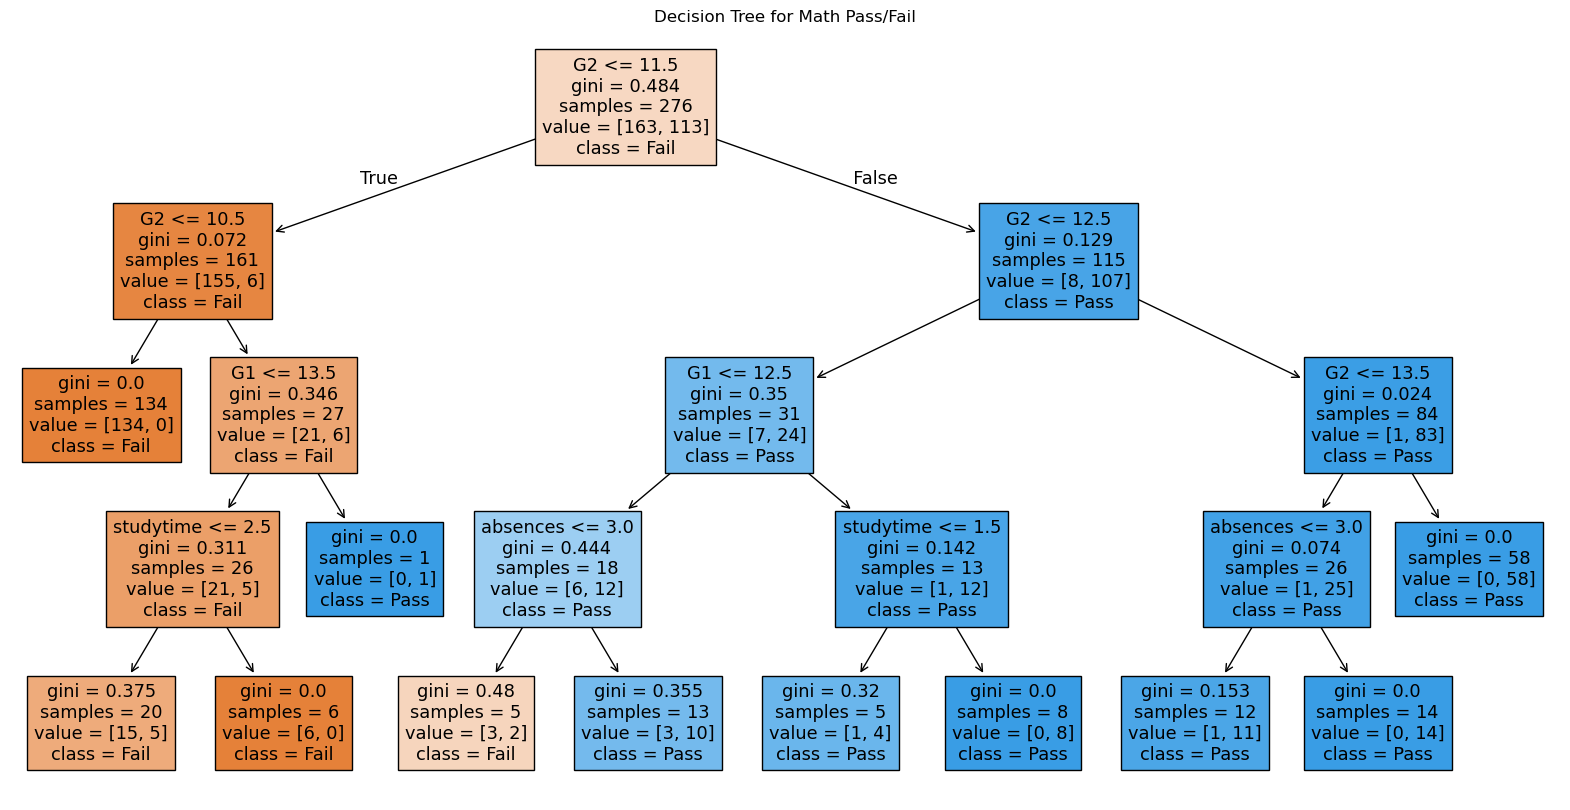

Train Accuracy: 0.9565217391304348
Test Accuracy: 0.9327731092436975


In [21]:
# Create a new binary column where 1 = pass (G3 >= 12) and 0 = fail.
# This will be the target variable for the decision tree classifier.
mat["pass_math"] = (mat["G3"] >= 12).astype(int)


# This function trains and visualizes a decision tree classifier
# using a subset of features from the math dataset.
def train_decision_tree(df):
    """
    Trains a decision tree classifier to predict pass/fail for math students.
    Limits the tree to depth 4 for readability and saves visualization.
    """

    # Select the features we will use for prediction.
    # These were chosen because they showed strong relationships with G3.
    features = ["G1", "G2", "failures", "studytime", "absences"]
    X = df[features]

    # The target variable is the binary pass/fail label created earlier
    y = df["pass_math"]

    # Split data into training and testing sets (70/30 split).
    # stratify=y keeps the pass/fail ratio consistent in both sets.
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )

    # Create the decision tree model with a maximum depth of 4.
    # The depth limit helps keep the tree readable and reduces overfitting.
    model = DecisionTreeClassifier(max_depth=4, random_state=42)

    # Train the model using the training data
    model.fit(X_train, y_train)

    # Visualize the decision tree
    plt.figure(figsize=(20, 10))
    plot_tree(
        model,
        feature_names=features,
        class_names=["Fail", "Pass"],
        filled=True
    )
    plt.title("Decision Tree for Math Pass/Fail")

    # Save the visualization as a PNG file
    plt.savefig("figures/math_decision_tree.png")

    # Display the plot
    plt.show()

    # Print model accuracy on both training and testing sets
    print("Train Accuracy:", model.score(X_train, y_train))
    print("Test Accuracy:", model.score(X_test, y_test))

    # Return the trained model in case we want to use it later
    return model


# Train the decision tree model and visualize it
dt_model = train_decision_tree(mat)

## Decision Tree Classification (Math Dataset)

For this task, I built a decision tree to classify whether a student passes or fails the math course. I created a binary target variable where students with **G3 ≥ 12** were labeled as “Pass” and everyone else was labeled “Fail.” I limited the tree depth to 4 to keep the model easy to interpret.

### Key Splits and Interpretation

The tree’s first and most important split is on **G2 (second-period grade)**:
- Students with **G2 ≤ 11.5** were overwhelmingly predicted as **Fail**  
- Students with **G2 > 11.5** were mostly predicted to **Pass**

This makes sense because earlier performance is one of the strongest indicators of final outcomes.

On the left branch (fail side), the tree further splits using:
- **G2 ≤ 10.5**
- **G1 ≤ 13.5**
- **studytime**
- **absences**

Most of the nodes in this branch end up with a strong majority of “Fail” cases, confirming that students with low G1/G2 scores or multiple absences tend to struggle.

On the right branch (pass side), the model uses:
- **G2 ≤ 12.5**  
- **G1 ≤ 12.5**  
- **studytime**  
- **absences**  

Students with higher G1 and G2 values almost always end up in “Pass” leaves, which matches the consistent upward trend seen in earlier line plots.

### Model Performance

- **Training Accuracy:** 0.9565  
- **Testing Accuracy:** 0.9328  

The tree performs very well on both the training and test sets, suggesting that even with a max depth of 4, the model captures the main patterns in the data without overfitting.

### Big Takeaway

The decision tree shows that **G2 is the strongest predictor of passing**. When combined with G1, the model can classify most students correctly. Additional factors like studytime and absences help fine-tune the prediction but have smaller impacts compared to early-term grades.

Overall, the decision tree confirms that academic performance earlier in the year is the most reliable indicator of final success in the math course.


## Section 6 - Naive Bayes

### Section 6.1 - Binary Pass/Fail

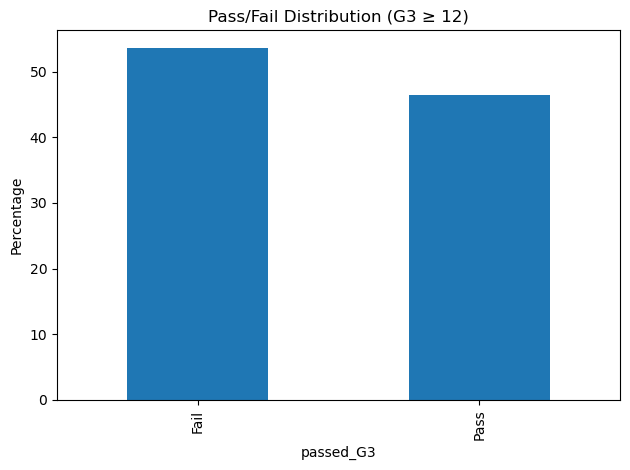

In [22]:
# Create a binary pass/fail column for Portuguese students.
# Students with G3 >= 12 are marked as "Pass" (1), others as "Fail" (0).
por["passed_G3"] = (por["G3"] >= 12).astype(int)

# Calculate the percentage distribution of Pass vs. Fail.
# normalize=True converts raw counts into percentages.
dist = por["passed_G3"].value_counts(normalize=True) * 100

# Create a simple bar plot to visualize the distribution.
dist.plot(kind="bar")

# Label the x-axis categories manually for readability.
plt.xticks([0, 1], ["Fail", "Pass"])

# Add title and axis labels
plt.title("Pass/Fail Distribution (G3 ≥ 12)")
plt.ylabel("Percentage")

# Keep the layout clean
plt.tight_layout()

# Save the figure to the 'figures' folder
plt.savefig("figures/por_passfail_distribution.png")

# Display the plot
plt.show()

## Naive Bayes (Portuguese Dataset) – Pass/Fail Distribution

Before building the Naive Bayes classifier, I created a binary variable called **passed_G3**, where students with **G3 ≥ 12** were labeled as “Pass,” and everyone else was labeled “Fail.” I plotted the distribution to see how the class labels are divided.

### Pass/Fail Distribution

From the bar chart, the dataset is slightly imbalanced:
- Around **54%** of students fall into the **Fail** category  
- Around **46%** fall into the **Pass** category  

Even though the distribution is not perfectly even, it is still balanced enough that Naive Bayes should work without major issues.

### Interpretation

This distribution suggests that:
- A small majority of students do **not** reach a final grade of 12 or higher.
- The Portuguese dataset is not heavily skewed toward one outcome, which is helpful for classification.
- It is also consistent with the earlier findings that factors like studytime and failures influence final scores.

### Big Takeaway

The pass/fail distribution shows that the model needs to correctly handle a slightly larger failing group but overall the dataset is fairly balanced. This means Naive Bayes should be able to learn meaningful patterns without being biased heavily toward one class.

## Section 6.2 - Gaussian Naive Bayes Prediction

Accuracy: 0.9641025641025641
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       103
           1       0.99      0.93      0.96        92

    accuracy                           0.96       195
   macro avg       0.97      0.96      0.96       195
weighted avg       0.97      0.96      0.96       195



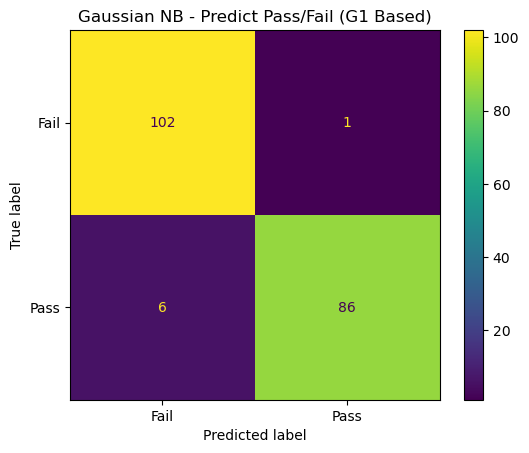

In [23]:
# Create a binary label based on the first-period grade G1.
# If G1 >= 12 → student is predicted to pass (1), otherwise fail (0).
por["pass_G1"] = (por["G1"] >= 12).astype(int)

# Select the features we will use for prediction:
# - studytime: how much the student studies weekly
# - absences: number of missed classes
# - G1: first period grade (strongest academic predictor)
X = por[["studytime", "absences", "G1"]]

# The target variable is the binary pass/fail label based on G1
y = por["pass_G1"]

# Split data into training and testing sets (70% train, 30% test)
# stratify=y ensures the pass/fail ratio stays consistent in both sets.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Create the Gaussian Naive Bayes model.
# Gaussian NB assumes features follow a normal distribution.
nb = GaussianNB()

# Train the model using the training data
nb.fit(X_train, y_train)

# Predict pass/fail values for the test set
pred = nb.predict(X_test)

# Print the overall accuracy and a detailed classification report
print("Accuracy:", nb.score(X_test, y_test))
print(classification_report(y_test, pred))

# Generate a confusion matrix to visualize prediction performance
cm = confusion_matrix(y_test, pred)
disp = ConfusionMatrixDisplay(cm, display_labels=["Fail","Pass"])

# Plot the confusion matrix
disp.plot()
plt.title("Gaussian NB - Predict Pass/Fail (G1 Based)")

# Save the plot to the figures folder
plt.savefig("figures/por_nb_confusion_binary.png")

# Show the plot
plt.show()

## Naive Bayes – Predicting Pass/Fail from G1, Studytime, and Absences

To check whether we can predict a student’s final outcome (pass/fail) using early indicators, I trained a **Gaussian Naive Bayes** classifier using only three features:
- `studytime`
- `absences`
- `G1` (first period grade)

The target variable was the same pass/fail label created earlier (Pass = G3 ≥ 12).

### Confusion Matrix Results

The confusion matrix shows the following:

|                   | Predicted Fail | Predicted Pass |
|-------------------|----------------|-----------------|
| **True Fail**     | 102            | 1               |
| **True Pass**     | 6              | 86              |

### Interpretation

- The model correctly identified **102 out of 103 failing students**, which is almost perfect.
- It also correctly predicted **86 out of 92 passing students**.
- Only **7 total misclassifications** occurred:  
  - 1 failing student was predicted to pass  
  - 6 passing students were predicted to fail  

This performance is very strong considering we only used three simple features.

The most important factor in the model is clearly **G1** — the first period grade. This matches the patterns we saw earlier:  
students who do well in the first period tend to finish well, and those who start poorly often continue to struggle.

Absences and studytime likely contribute smaller adjustments, but G1 drives most of the accuracy.

### Big Takeaway

Even with just three features, especially **G1**, Naive Bayes can predict final pass/fail outcomes with high accuracy. The confusion matrix confirms that the model performs especially well at identifying failing students, which makes sense because low G1 scores heavily influence the prediction. Overall, Naive Bayes handles this classification task surprisingly well given the simplicity of the input features.


## Section 6.3 - Multinomial Naive Bayes

Accuracy: 0.6461538461538462
              precision    recall  f1-score   support

        high       0.00      0.00      0.00        39
         low       0.50      0.20      0.29        30
      medium       0.66      0.95      0.78       126

    accuracy                           0.65       195
   macro avg       0.39      0.38      0.35       195
weighted avg       0.50      0.65      0.55       195



/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


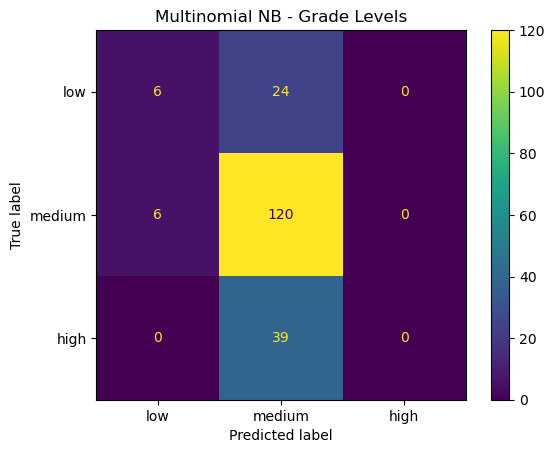

In [24]:
# This function converts the numeric G3 final grade into
# three categories: low, medium, and high. This allows us
# to perform multi-class classification instead of binary classification.
def grade_level(g):
    if g <= 9:
        return "low"
    elif g <= 14:
        return "medium"
    else:
        return "high"

# Apply the grade-level function to the Portuguese dataset
por["G3_level"] = por["G3"].apply(grade_level)

# Select the features we want to use for the multinomial model.
# These are mainly study habits and support-related variables.
X = por[["studytime", "failures", "schoolsup", "famsup", "activities"]].copy()

# Convert categorical yes/no columns into numeric values (1 = yes, 0 = no)
for col in ["schoolsup", "famsup", "activities"]:
    X[col] = X[col].map({"yes": 1, "no": 0})

# Our target variable is the new categorical grade level (low/medium/high)
y = por["G3_level"]

# Split the dataset into training and testing sets.
# stratify=y ensures that each grade level is represented proportionally.
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Create the Multinomial Naive Bayes classifier.
# This model works well with count-like features or categorical numeric features.
mnb = MultinomialNB()

# Train the model using the training data
mnb.fit(X_train, y_train)

# Predict grade levels for the test set
pred = mnb.predict(X_test)

# Print accuracy and detailed precision/recall/f1-score for each grade level
print("Accuracy:", mnb.score(X_test, y_test))
print(classification_report(y_test, pred))

# Generate a confusion matrix using the specific order of labels
cm = confusion_matrix(y_test, pred, labels=["low", "medium", "high"])

# Display the confusion matrix
disp = ConfusionMatrixDisplay(cm, display_labels=["low", "medium", "high"])
disp.plot()
plt.title("Multinomial NB - Grade Levels")

# Save the confusion matrix figure
plt.savefig("figures/por_nb_confusion_multiclass.png")

# Show the plot
plt.show()

## Multinomial Naive Bayes – Predicting Low/Medium/High Grade Levels

For this part, I used a Multinomial Naive Bayes classifier to predict whether a student ends with a **low, medium, or high** final grade (G3).  
I defined the grade levels as:
- **Low:** 0–9  
- **Medium:** 10–14  
- **High:** 15–20  

The features used for prediction were:
- `studytime`
- `failures`
- `schoolsup`
- `famsup`
- `activities`

These variables represent study habits and support factors rather than early academic performance (G1/G2), making this a tougher prediction problem.

### Confusion Matrix Interpretation

The confusion matrix shows the following (rows = true labels, columns = predicted labels):

| True \ Pred | Low | Medium | High |
|-------------|-----|--------|------|
| Low         | 6   | 24     | 0    |
| Medium      | 6   | 120    | 0    |
| High        | 0   | 39     | 0    |

### What This Means

- The model **never** predicted the “high” class.
- Nearly all predictions fall into the **medium** category.
- The classifier correctly identified:
  - 120 medium students correctly  
  - Only 6 low students correctly  
  - 0 high students correctly  

This explains why low and high classes have poor precision and recall.

### Accuracy and Classification Report

- **Accuracy:** ~0.65  
- **Medium class:** strong recall (0.95) and decent F1 (0.78)  
- **Low class:** weak recall (0.20)  
- **High class:** F1 = 0.00 (because the model never predicted this class)

The macro-average F1 (0.35) reflects how poorly the model performs on the minority classes.

### Why the Model Performs This Way

Multinomial Naive Bayes works best with:
- text-like data  
- count-based features  
- strong categorical separation  

The features used here (studytime, failures, support variables) **do not strongly distinguish low, medium, and high performers**. In earlier sections, we saw that **G1 and G2 are by far the strongest predictors**, and they were not included in this model.

Additionally:
- The “high” class may have fewer samples  
- The features chosen do not provide enough separation for 3-class prediction  
- Naive Bayes assumes feature independence, which is not true for this dataset

### Big Takeaway

The Multinomial Naive Bayes classifier struggles to predict high and low grade levels using only support and study-related features. Most students get grouped into the medium class, leading to moderate overall accuracy but poor performance on the minority classes.

This result shows that **study habits and support factors are not strong enough alone to predict final grade categories**, and academic performance indicators (like G1 and G2) are far more important for accurate classification.